# Projeto #2 - Classificador supervisionado

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) Qual a base escolhida?

*Base escolhida:* Forest covertypes - https://archive.ics.uci.edu/ml/datasets/Covertype  

### 2) **(10%)** Pré-processamento: entendimento do conjunto de dados
- Quais são minhas features?
- Quais são minhas classes?
- Como estão distribuidas minhas classes?
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


### Importa as bibliotecas

In [1]:
import logging
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfTransformer

%matplotlib inline

warnings.filterwarnings('ignore')
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

### Carrega o conjunto de dados

In [2]:
covtype = fetch_covtype(download_if_missing=True, shuffle=True, random_state=1)

### Descrição do conjunto de dados

Previsão do tipo de cobertura florestal utilizando as variáveis cartográfica dos dados do Sistema de Informações sobre Recursos (RIS) da Região 2 do Serviço Florestal dos EUA (USFS). Esta área de estudo inclui quatro áreas selvagens localizadas na Floresta Nacional de Roosevelt, no norte do Colorado e representam florestas com um mínimo de distúrbios causados pelo homem. 

As amostras deste conjunto de dados correspondem a manchas de floresta de 30 × 30m coletadas para a tarefa de prever o tipo de cobertura de cada mancha, ou seja, as espécies dominantes de árvores.

### Características do conjunto de dados:

##### 7 Classes
##### 581012 exemplos
##### 54 dimensões
##### Features do tipo int

In [3]:
print(covtype.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like object
with the feature matrix in the ``data`` member
and the target values in ``target``.
The dataset will be d

### Exploração dos dados

In [3]:
target = covtype.target
print('Shape target: {}'.format(target.shape))
print('Dtype target: {}'.format(target.dtype))

Shape target: (581012,)
Dtype target: int32


In [5]:
print('Example target: {}'.format(target[:5]))

Example target: [2 1 6 2 1]


In [4]:
data = covtype.data
print('Shape data: {}'.format(data.shape))
print('Dtype data: {}'.format(data.dtype))

Shape data: (581012, 54)
Dtype data: float64


In [7]:
print('Example data: {}'.format(data[0]))

Example data: [2.949e+03 1.010e+02 2.100e+01 6.930e+02 1.510e+02 3.009e+03 2.500e+02
 2.060e+02 7.400e+01 5.950e+02 0.000e+00 0.000e+00 1.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]


#### Separação em treino e teste

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=1, shuffle=True)

In [9]:
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (389278, 54)
X_test shape: (191734, 54)
y_train shape: (389278,)
y_test shape: (191734,)


### 3) **(80%)** Nos blocos seguintes implemente seus classificadores (serão implementados 2 métodos diferentes).

#### 3.1) Qual método escolhido?

##### Regressão Logística: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#### 3.2) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [109]:
from sklearn.linear_model import LogisticRegression

#### Pipeline com a implementação do modelo

In [11]:
logReg = Pipeline(steps=[
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression())
])

#### Ajustando o modelo aos dados

In [12]:
logReg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

#### Prevendo os rótulos

In [13]:
y_pred = logReg.predict(X_test)

#### Métricas do modelo

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.61      0.56      0.58     70006
           2       0.61      0.79      0.69     93254
           3       0.54      0.28      0.37     11754
           4       0.00      0.00      0.00       906
           5       0.00      0.00      0.00      3185
           6       0.37      0.04      0.08      5788
           7       0.00      0.00      0.00      6841

    accuracy                           0.61    191734
   macro avg       0.30      0.24      0.25    191734
weighted avg       0.56      0.61      0.57    191734



#### 3.3) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

#### Redução de dimensionalidade usando truncated SVD e normalizando os dados com MaxAbsScaler

In [6]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MaxAbsScaler

#### Adicionando MinMaxScaler e TruncatedSVD ao pipeline do modelo

In [16]:
logReg = Pipeline(steps=[
    ('tfidf', TfidfTransformer()),
    ('scaler', MaxAbsScaler()),
    ('svd', TruncatedSVD(n_components=30)),
    ('clf', LogisticRegression())
])

#### Ajustando o modelo aos dados

In [18]:
logReg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('scaler', MaxAbsScaler(copy=True)),
                ('svd',
                 TruncatedSVD(algorithm='randomized', n_components=30, n_iter=5,
                              random_state=None, tol=0.0)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

#### Prevendo os rótulos

In [19]:
y_pred = logReg.predict(X_test)

#### Métricas do modelo

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.50      0.57     70006
           2       0.65      0.82      0.73     93254
           3       0.63      0.81      0.71     11754
           4       0.48      0.37      0.42       906
           5       0.78      0.02      0.03      3185
           6       0.42      0.11      0.18      5788
           7       0.65      0.47      0.54      6841

    accuracy                           0.65    191734
   macro avg       0.61      0.44      0.45    191734
weighted avg       0.65      0.65      0.63    191734



#### 3.4) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

#### Aplicando GridSearch para escolha dos hiperparâmetro

In [7]:
from sklearn.model_selection import GridSearchCV

#### Pipeline do modelo que será passado para o GridSearch

In [12]:
pipe = Pipeline(steps=[
    ('tfidf', TfidfTransformer()),
    ('scaler', MaxAbsScaler()),
    ('svd', TruncatedSVD(n_components=30)),
    ('clf', LogisticRegression())
])

#### Definindo os parâmetros

In [13]:
parameters = {
    'clf__penalty': ['l1', 'l2'],
    'clf__C':[0.001, 0.01, 1, 10],
    'clf__solver': ('newton-cg', 'lbfgs', 'sag', 'saga')
}

#### GridSearch

In [14]:
grid = GridSearchCV(pipe, parameters, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [15]:
grid_result = grid.fit(data, target)

In [16]:
best_params = grid_result.best_params_
best_params

{'clf__C': 10, 'clf__penalty': 'l1', 'clf__solver': 'saga'}

#### Modelo com os hiperparêmetros ajustados

In [17]:
logRegBest = Pipeline(steps=[
    ('tfidf', TfidfTransformer()),
    ('scaler', MaxAbsScaler()),
    ('svd', TruncatedSVD(n_components=50)),
    ('clf', LogisticRegression(
        penalty = best_params['clf__penalty'],
        C = best_params['clf__C'],
        solver = best_params['clf__solver'],
        multi_class = 'multinomial',
        n_jobs = -1,
        max_iter = 1000
    ))
])

#### Ajustando o modelo aos dados

In [111]:
logRegBest.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('scaler', MaxAbsScaler(copy=True)),
                ('svd',
                 TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
                              random_state=None, tol=0.0)),
                ('clf',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='multinomial', n_jobs=-1,
                                    penalty='l1', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

#### Prevendo os rótulos

In [112]:
y_pred = logRegBest.predict(X_test)

#### Métricas do modelo

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.71      0.69      0.70     70006
           2       0.74      0.81      0.77     93254
           3       0.68      0.79      0.73     11754
           4       0.60      0.42      0.49       906
           5       0.45      0.03      0.06      3185
           6       0.49      0.26      0.34      5788
           7       0.73      0.56      0.64      6841

    accuracy                           0.72    191734
   macro avg       0.63      0.51      0.53    191734
weighted avg       0.71      0.72      0.71    191734



#### Matriz de confusão

In [114]:
from sklearn.metrics import plot_confusion_matrix

Text(0.5, 1.0, 'Confusion matrix logistic regression')

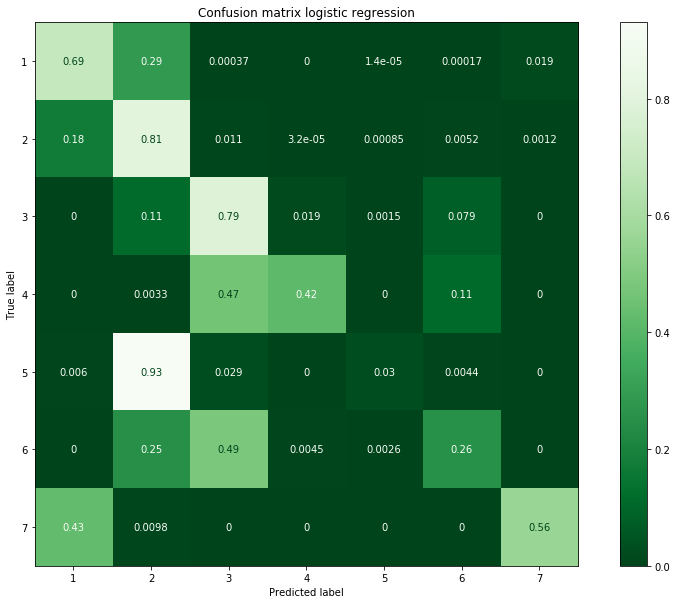

In [135]:
np.set_printoptions(precision=2)

plt.rcParams['figure.figsize'] = [15, 10]

disp = plot_confusion_matrix(logRegBest, X_test, y_test,
                                 display_labels=[1, 2, 3, 4, 5, 6, 7],
                                 cmap=plt.cm.Greens_r,
                                 normalize='true'
                                 )
disp.ax_.set_title('Confusion matrix logistic regression')

#### 3.5) Qual método escolhido?

##### SGDClassifier:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

#### 3.6) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [8]:
from sklearn.linear_model import SGDClassifier

#### Pipeline com a implementação do modelo

In [8]:
sgd = Pipeline(steps=[
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier())
])

#### Ajustando o modelo aos dados

In [9]:
sgd.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

#### Prevendo os rótulos

In [10]:
y_pred = sgd.predict(X_test)

#### Métricas do modelo

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.52      0.15      0.23     70006
           2       0.51      0.90      0.65     93254
           3       0.43      0.27      0.34     11754
           4       0.00      0.00      0.00       906
           5       0.05      0.00      0.00      3185
           6       0.09      0.01      0.02      5788
           7       0.00      0.00      0.00      6841

    accuracy                           0.51    191734
   macro avg       0.23      0.19      0.18    191734
weighted avg       0.47      0.51      0.42    191734



#### 3.7) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

#### Adicionando MinMaxScaler e TruncatedSVD ao pipeline do modelo

In [105]:
sgd = Pipeline(steps=[
    ('tfidf', TfidfTransformer()),
    ('scaler', MaxAbsScaler()),
    ('svd', TruncatedSVD(n_components=50)),
    ('clf', SGDClassifier())
])

#### Ajustando o modelo aos dados

In [106]:
sgd.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('scaler', MaxAbsScaler(copy=True)),
                ('svd',
                 TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
                              random_state=None, tol=0.0)),
                ('clf',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_sta

#### Prevendo os rótulos

In [107]:
y_pred = sgd.predict(X_test)

#### Métricas do modelo

In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.51      0.59     70006
           2       0.66      0.84      0.74     93254
           3       0.60      0.88      0.71     11754
           4       0.65      0.13      0.21       906
           5       0.24      0.02      0.04      3185
           6       0.50      0.01      0.03      5788
           7       0.68      0.48      0.56      6841

    accuracy                           0.66    191734
   macro avg       0.57      0.41      0.41    191734
weighted avg       0.66      0.66      0.64    191734



#### 3.8) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

#### Pipeline do modelo que será passado para o GridSearch

In [11]:
pipe = Pipeline(steps=[
    ('tfidf', TfidfTransformer()),
    ('scaler', MaxAbsScaler()),
    ('svd', TruncatedSVD(n_components=30)),
    ('clf', SGDClassifier())
])

#### Definindo os parâmetros

In [12]:
parameters = {
    'clf__penalty': ['l1', 'l2'],
    'clf__loss':( 'hinge', 'modified_huber', 'squared_hinge'),
    'clf__alpha': [0.0001, 0.001, 0.01, 1]
}

#### GridSearch

In [13]:
grid = GridSearchCV(pipe, parameters, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [15]:
grid_result = grid.fit(data, target)

In [17]:
best_params = grid_result.best_params_
best_params

{'clf__alpha': 0.0001, 'clf__loss': 'hinge', 'clf__penalty': 'l2'}

#### Modelo com os hiperparêmetros ajustados

In [101]:
sgdBest = Pipeline(steps=[
    ('tfidf', TfidfTransformer()),
    ('scaler', MaxAbsScaler()),
    ('svd', TruncatedSVD(n_components=50)),
    ('clf', SGDClassifier(
        penalty = best_params['clf__penalty'],
        loss = best_params['clf__loss'],
        alpha = best_params['clf__alpha'],
        n_jobs = -1,
        max_iter = 1000
    ))
])

#### Ajustando o modelo aos dados

In [102]:
sgdBest.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('scaler', MaxAbsScaler(copy=True)),
                ('svd',
                 TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
                              random_state=None, tol=0.0)),
                ('clf',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=-1,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start

#### Prevendo os rótulos

In [103]:
y_pred = sgdBest.predict(X_test)

#### Métricas do modelo

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.52      0.59     70006
           2       0.67      0.83      0.74     93254
           3       0.60      0.88      0.71     11754
           4       0.63      0.14      0.23       906
           5       0.29      0.03      0.05      3185
           6       0.47      0.03      0.05      5788
           7       0.68      0.50      0.57      6841

    accuracy                           0.67    191734
   macro avg       0.58      0.42      0.42    191734
weighted avg       0.66      0.67      0.64    191734



#### Matriz de confusão

Text(0.5, 1.0, 'Confusion matrix SGD')

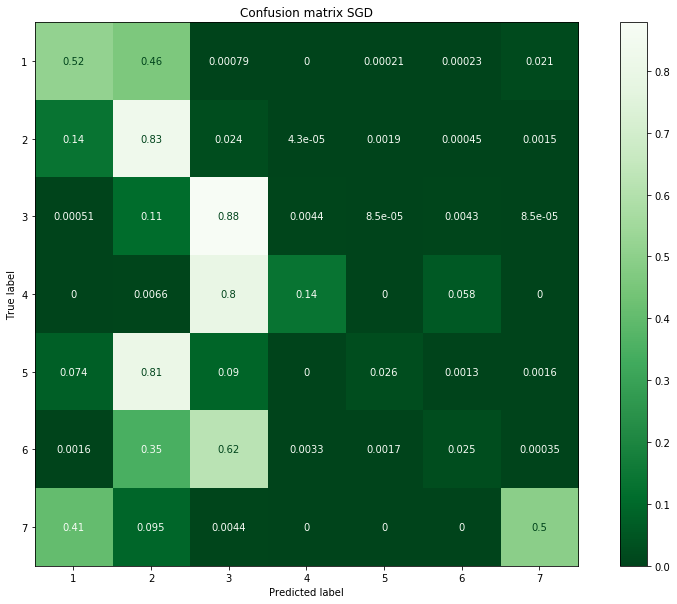

In [139]:
np.set_printoptions(precision=2)

plt.rcParams['figure.figsize'] = [15, 10]

disp = plot_confusion_matrix(sgdBest, X_test, y_test,
                                 display_labels=[1, 2, 3, 4, 5, 6, 7],
                                 cmap=plt.cm.Greens_r,
                                 normalize='true'
                                 )
disp.ax_.set_title('Confusion matrix SGD')

### 5) **(10%)** Conclusões

*Compare seus resultados. Imaginando que sua solução fosse para produção, qual deles você escolheria? Por que? Quais os riscos você enxerga? O que recomendaria de próximos passos para melhorar os resultados?*

**Modelo escolhido:** modelo de Regressão logística, pois além de ter obtido uma acurácia maior, o modelo apresentou melhor precisão.

**Riscos:**

**Recomendações:** Para melhoria dos resultados recomendo a aplicação de técnicas de Ensemble ou stacking que podem fornecer melhoria no desempenho, testes de mais modelos e hiperparâmetros, obtenção de mais dados e aplicação de engenharia de features.